In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("housepricedata.csv")

In [3]:
df.shape

(1460, 11)

In [4]:
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [5]:
dataset = df.values

In [6]:
df.values.shape

(1460, 11)

converting the dataframe into array to process

In [7]:
type(dataset)

numpy.ndarray

spliting our data into input features (X) and predict as (Y)

1 we will assign the first 10 features to (X)

2 we will assign the last column to prediction as (Y)

In [8]:
X = dataset[ : , 0: 10]

we put ‘:’ before the comma. This means to take all the rows in dataset and put it in X.

We want to extract out the first 10 columns, and so the ‘0:10’ after the comma means take columns 0 to 9 

In [9]:
X.shape

(1460, 10)

assigning the last feature or column to Y

In [10]:
Y = dataset[:,10]

In [11]:
Y.shape

(1460,)

we known  import libarys and pacakages we want 

In [12]:
from sklearn import preprocessing

within sklearn package we will use function called as [SKLEARN] 

which scales the dataset , so that input features lie between 0 and 1

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [14]:
X_scale.shape

(1460, 10)

Now, we process the data , split our dataset into [training,validation,testing]

we will import the scikit-learn called 'train_test_split'


In [15]:
from sklearn.model_selection import train_test_split

Taken test_size as 30%

and store split data into ["first four variables"] on the left side of the
equal sign

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [17]:
print("length of X_training_set:",len(X_train))
print("length of X_validation_set_TESTING:",len(X_val_and_test))
print("lenght of Y_TRANING_SET:",len(Y_train))
print("length of Y VALIDATION_SET_TESTING:",len(Y_val_and_test))

length of X_training_set: 1022
length of X_validation_set_TESTING: 438
lenght of Y_TRANING_SET: 1022
length of Y VALIDATION_SET_TESTING: 438


WE SEPERATE OR TAKEN ONLY 30% [OF DATA TO TESTING] 

SO WE NOW SPILT THE  TESTING 30% INTO 

15% FOR VALIDATION 

15% FOR TESTING 

In [18]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

WE HAVE TOTAL OF SIX VARIABLES FOR OUR DATASET 


>>>> X_train (10 input features, 70% of full dataset)

>>>> X_val (10 input features, 15% of full dataset)

>>>> X_test (10 input features, 15% of full dataset)

>>>> Y_train (1 label, 70% of full dataset)

>>>> Y_val (1 label, 15% of full dataset)

>>>> Y_test (1 label, 15% of full dataset)

In [19]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
print("X_TRAINING CONTAINS:",X_train.shape)
print("X_ VALIDATION CONTAINS:",X_val.shape)
print("X_TESTING CONTAINS:",X_test.shape)
print("Y_TRAINIG CONTAINS:",Y_train.shape)
print("Y_VALIDATION CONTAINS:",Y_val.shape)
print("Y_TESTING CONTAINS:",Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)
X_TRAINING CONTAINS: (1022, 10)
X_ VALIDATION CONTAINS: (219, 10)
X_TESTING CONTAINS: (219, 10)
Y_TRAINIG CONTAINS: (1022,)
Y_VALIDATION CONTAINS: (219,)
Y_TESTING CONTAINS: (219,)


SETTING UP THE ARCHITECTURE 

Hidden layer 1: 32 neurons, ReLU activation

Hidden layer 2: 32 neurons, ReLU activation

Output Layer: 1 neuron, Sigmoid activation

FIRST ,LETS IMPORT KERAS

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [56]:
model = Sequential([
    Dense(42 , activation='relu', input_shape =(10,)),
    Dense(42 , activation='relu'),
    Dense(1, activation='sigmoid')
])

filling the best numbers 

In [41]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
               metrics=['accuracy'])

TRAINING ON THE DATA 

In [55]:
hist = model.fit(X_train, Y_train,
          batch_size=42, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.8865 - val_loss: 0.2595 - val_accuracy: 0.8995
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.8875 - val_loss: 0.2585 - val_accuracy: 0.8950
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8885 - val_loss: 0.2601 - val_accuracy: 0.8995
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8885 - val_loss: 0.2581 - val_accuracy: 0.9041
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8885 - val_loss: 0.2570 - val_accuracy: 0.8950
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.8875 - val_loss: 0.2574 - val_accuracy: 0.9041
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2718 - accuracy: 0.8885 - val_loss: 0.2562 - val_accuracy: 0.8950
Epoch 8/100
2

AFTER 100 EPOCHS WE GOT  THE ABOVE OUTPUT

TESTING THE MODEL 

The reason why we have the index 1 after the model.evaluate function is because the function returns 

the loss as the first element and the accuracy as the second element.

In [29]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8630


0.8630136847496033

visualize the TRAINING LOSS AND VALIDATION LOSS

In [33]:
import matplotlib.pyplot as plt 

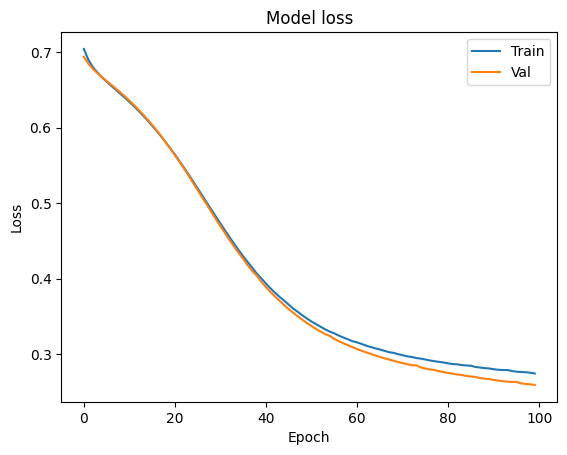

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

TRAINING ACCURACY AND VALIDATION ACCURACY 

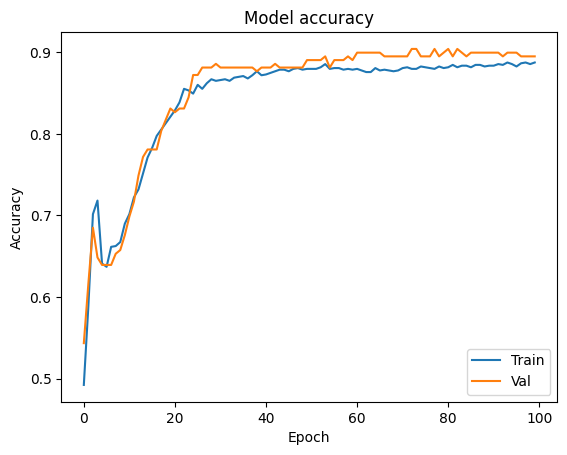

In [42]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

ADDING REGULARIZATION TO OUT NEURAL NETWORK

MODEL 2  CHAGING OPTIMIZER AS ADAM

In [45]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 40ms/step - loss: 0.4689 - accuracy: 0.7750 - val_loss: 0.3128 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3354 - accuracy: 0.8659 - val_loss: 0.2564 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3265 - accuracy: 0.8611 - val_loss: 0.3240 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2796 - accuracy: 0.8875 - val_loss: 0.2598 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.2567 - accuracy: 0.8924 - val_loss: 0.2491 - val_accuracy: 0.9132
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2494 - accuracy: 0.8973 - val_loss: 0.2758 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2452 - accuracy: 0.9002 - val_loss: 0.2326 - val_accuracy: 0.8904
Epoch 

Adam is one of the most common optimizers we use, which adds some 

tweaks to stochastic gradient descent such that it reaches the lower 

loss function faster. 

PLOT THE GRAPH FOR MODEL2

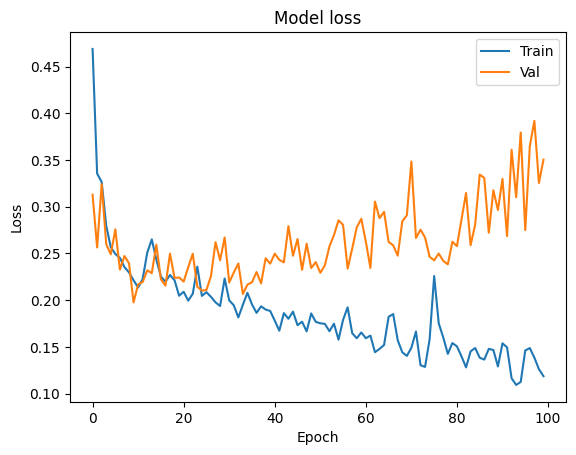

In [46]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

ACCURACY

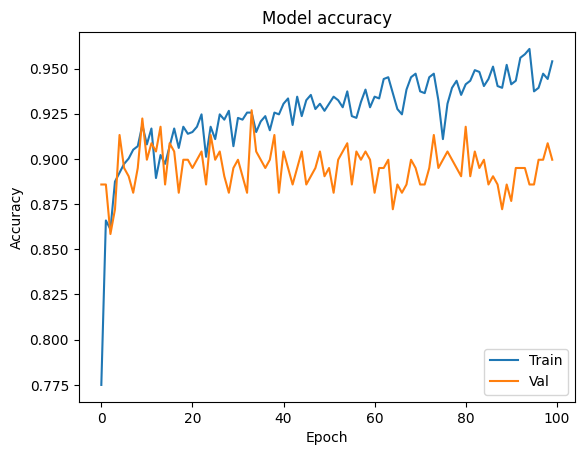

In [48]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

lets try to reduce over fitting 


taking L2 REGULARIZATION

In [49]:
from keras.layers import Dropout
from keras import regularizers

MODEL 3

In [50]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [51]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 48ms/step - loss: 14.2435 - accuracy: 0.5910 - val_loss: 3.9111 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 1s 47ms/step - loss: 1.6642 - accuracy: 0.8337 - val_loss: 0.6535 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5707 - accuracy: 0.8474 - val_loss: 0.4861 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5485 - accuracy: 0.8346 - val_loss: 0.5494 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4982 - accuracy: 0.8689 - val_loss: 0.4569 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5082 - accuracy: 0.8611 - val_loss: 0.4532 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4657 - accuracy: 0.8708 - val_loss: 0.4389 - val_accuracy: 0.8904
Epoch

LOSS GRAPH FOR MODEL3

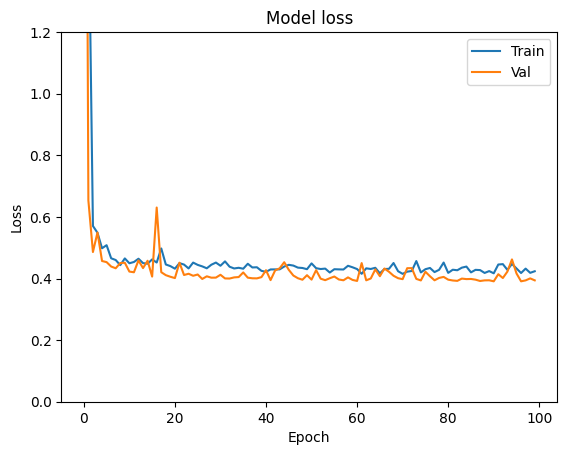

In [52]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

MODEL ACCURACY FOR MODEL 3

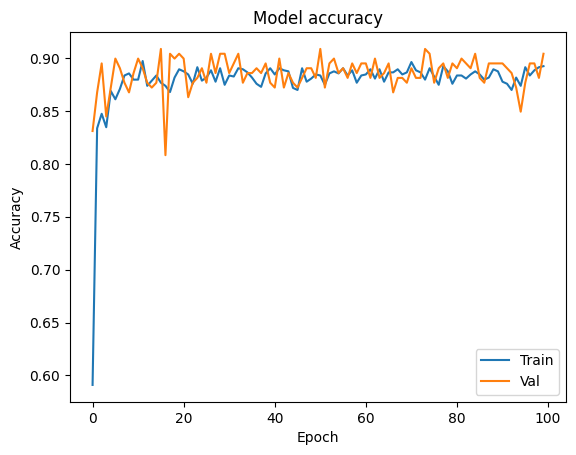

In [54]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

 TO DEAL WITH THE OVERFITTING WE USED L2 -RIDGE EUGULARIZATION